In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Challenge
Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

# Aim
Predict infant mortality using health,nutrition data and GDP data. 

# Load and merge data

In [2]:
# GDP data
GDP= pd.read_csv("UNdata_Export_20180728_185132879.csv")
# Transform from skinny into wide format
cGDP = GDP.pivot_table(index=['Country or Area','Year'], columns=['Description'],values='Value').reset_index().rename_axis(None, axis=1)
print(cGDP.shape)
cGDP = cGDP[['Country or Area','Year','GDP VOLUME % CHANGE', 'GROSS DOMESTIC PRODUCT']]
cGDP['Year']=cGDP['Year'].apply(int)
cGDP= cGDP.rename(index=str, columns={"Country or Area": "Country Name"})
cGDP['Country Name']= cGDP['Country Name'].str.lower()
print(cGDP.head())

(11733, 261)
         Country Name  Year  GDP VOLUME % CHANGE  GROSS DOMESTIC PRODUCT
0  advanced economies  1968                  NaN                     NaN
1  advanced economies  1969              5.71050                     NaN
2  advanced economies  1970              3.59522                     NaN
3  advanced economies  1971              3.52803                     NaN
4  advanced economies  1972              5.23774                     NaN


In [3]:
# Health and nutrition data
HN= pd.read_csv("morecomplex.csv")
sHN = pd.melt(HN, id_vars=['Country Name', 'Country Code','Indicator Name','Indicator Code'])
sHN=sHN.rename(index=str, columns={"variable": "Year"})

# Transform from skinny into wide format
cHN = sHN.pivot_table(index=['Country Name','Year'], columns=['Indicator Code'],values='value').reset_index().rename_axis(None, axis=1)
# Select some interesting variables
#cHN = cHN[['Country Name', 'Year','SE.PRM.ENRR','SE.SEC.ENRR','SE.TER.ENRR','SE.ADT.1524.LT.FM.ZS','SE.XPD.TOTL.GD.ZS',
           #'SE.PRM.CMPT.ZS','SE.ADT.LITR.ZS','SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS','SH.XPD.TOTL.CD','SH.MED.BEDS.ZS',
           #'SH.DTH.COMM.ZS', 'SH.STA.STNT.ZS','SH.STA.MALN.ZS','SN.ITK.DEFC','SL.TLF.TOTL.IN','SH.DYN.NMRT','SH.DYN.MORT','SH.DTH.IMRT']]
cHN['Year']=cHN['Year'].apply(int)
cHN['Country Name']= cHN['Country Name'].str.lower()
print(cHN.shape)
print(cHN.head())

(14448, 347)
  Country Name  Year  NY.GNP.PCAP.CD  SE.ADT.1524.LT.FM.ZS  \
0  afghanistan  1960             NaN                   NaN   
1  afghanistan  1961             NaN                   NaN   
2  afghanistan  1962             NaN                   NaN   
3  afghanistan  1963             NaN                   NaN   
4  afghanistan  1964             NaN                   NaN   

   SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   

   SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.ENR.ORPH     ...       \
0                NaN             NaN          NaN     ...        
1                NaN             NaN          NaN     ...        
2                NaN     

In [4]:
# Merge data by Country and Year
sdf = cHN.merge(cGDP, on=["Country Name","Year"])
sdf.head()

,Country Name,Year,NY.GNP.PCAP.CD,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,SE.ENR.ORPH,...,SP.REG.DTHS.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.UWT.TFRT,GDP VOLUME % CHANGE,GROSS DOMESTIC PRODUCT
0,albania,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1114818.0,1.980338,69.295,5.391541,493982.0,30.705,NaN,NaN,NaN
1,albania,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1146208.0,2.776794,69.057,3.893010,513592.0,30.943,NaN,NaN,NaN
2,albania,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1180553.0,2.952387,68.985,3.289207,530766.0,31.015,NaN,NaN,NaN
3,albania,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1214693.0,2.850840,68.914,3.182265,547928.0,31.086,NaN,NaN,NaN
4,albania,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1248887.0,2.776138,68.842,3.112068,565248.0,31.158,NaN,NaN,NaN


# Clean data

In [5]:
# Drop NAs
# How much data is missing in the target column
print('Sum of missing datapoints for GDP volume % change', sdf['SP.DYN.IMRT.IN'].isnull().sum())
# Remove those missing data points
print(sdf.shape)
sdf= sdf[-sdf['SP.DYN.IMRT.IN'].isnull()]
print(sdf.shape)
print(sdf.head())

# Keep columns that contain less than 50% Na
criteria=sdf.ix[:,0:349].isnull().sum()<0.4*sdf.shape[0]

sdfLessNa=sdf[criteria.index[criteria]]
print(sdfLessNa.shape)
print(sdfLessNa.head())


sdf1= sdfLessNa.dropna()
print(sdf1.shape)
print(sdf1.head())


Sum of missing datapoints for GDP volume % change 925
(7960, 349)
(7035, 349)
   Country Name  Year  NY.GNP.PCAP.CD  SE.ADT.1524.LT.FM.ZS  \
18      albania  1978             NaN                   NaN   
19      albania  1979             NaN                   NaN   
20      albania  1980             NaN                   NaN   
21      albania  1981             NaN                   NaN   
22      albania  1982             NaN                   NaN   

    SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
18                   NaN                NaN                NaN   
19                   NaN                NaN                NaN   
20                   NaN                NaN                NaN   
21                   NaN                NaN                NaN   
22                   NaN                NaN                NaN   

    SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.ENR.ORPH           ...            \
18                NaN             NaN          NaN           ...    

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


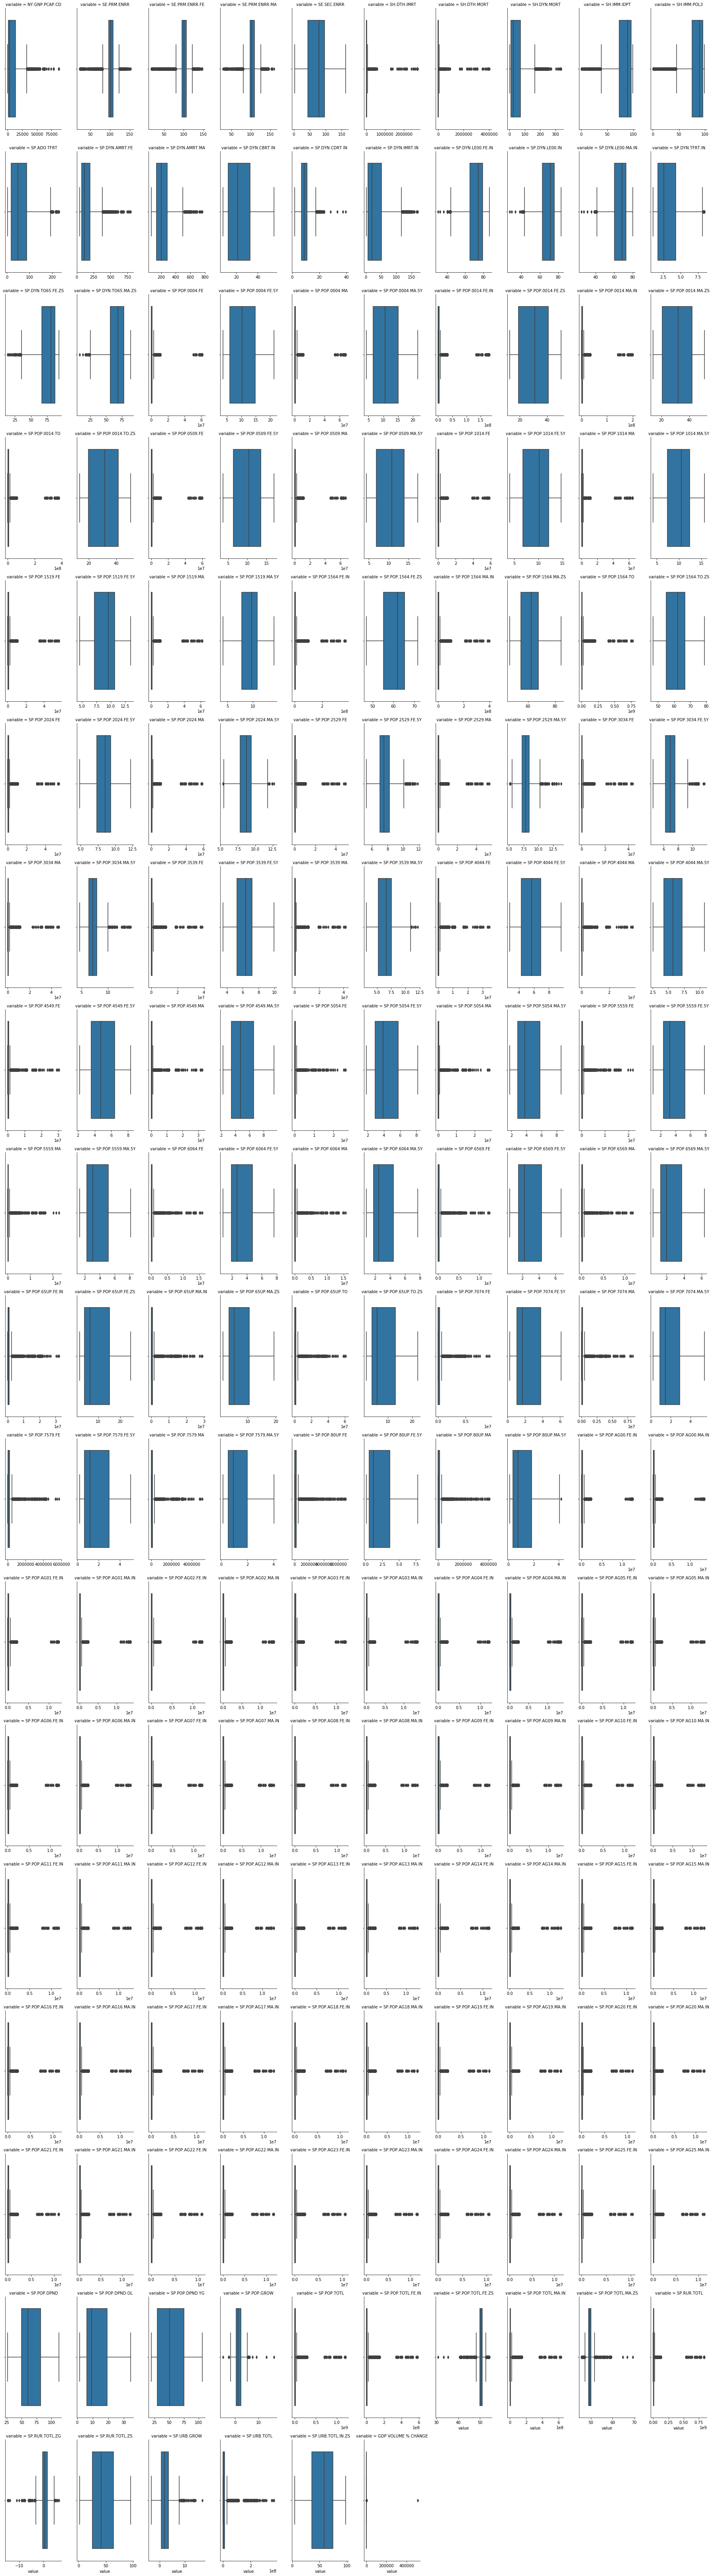

In [6]:
# explore the remaining variables for outliers
skinnydf1=pd.melt(sdf1, id_vars=['Country Name', 'Year'])
#print(skinnydf1)
g = sns.FacetGrid(skinnydf1, col="variable", sharey=False,sharex=False, col_wrap=10, size=5, aspect=.5)
g = g.map(sns.boxplot, "value")
plt.show()

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


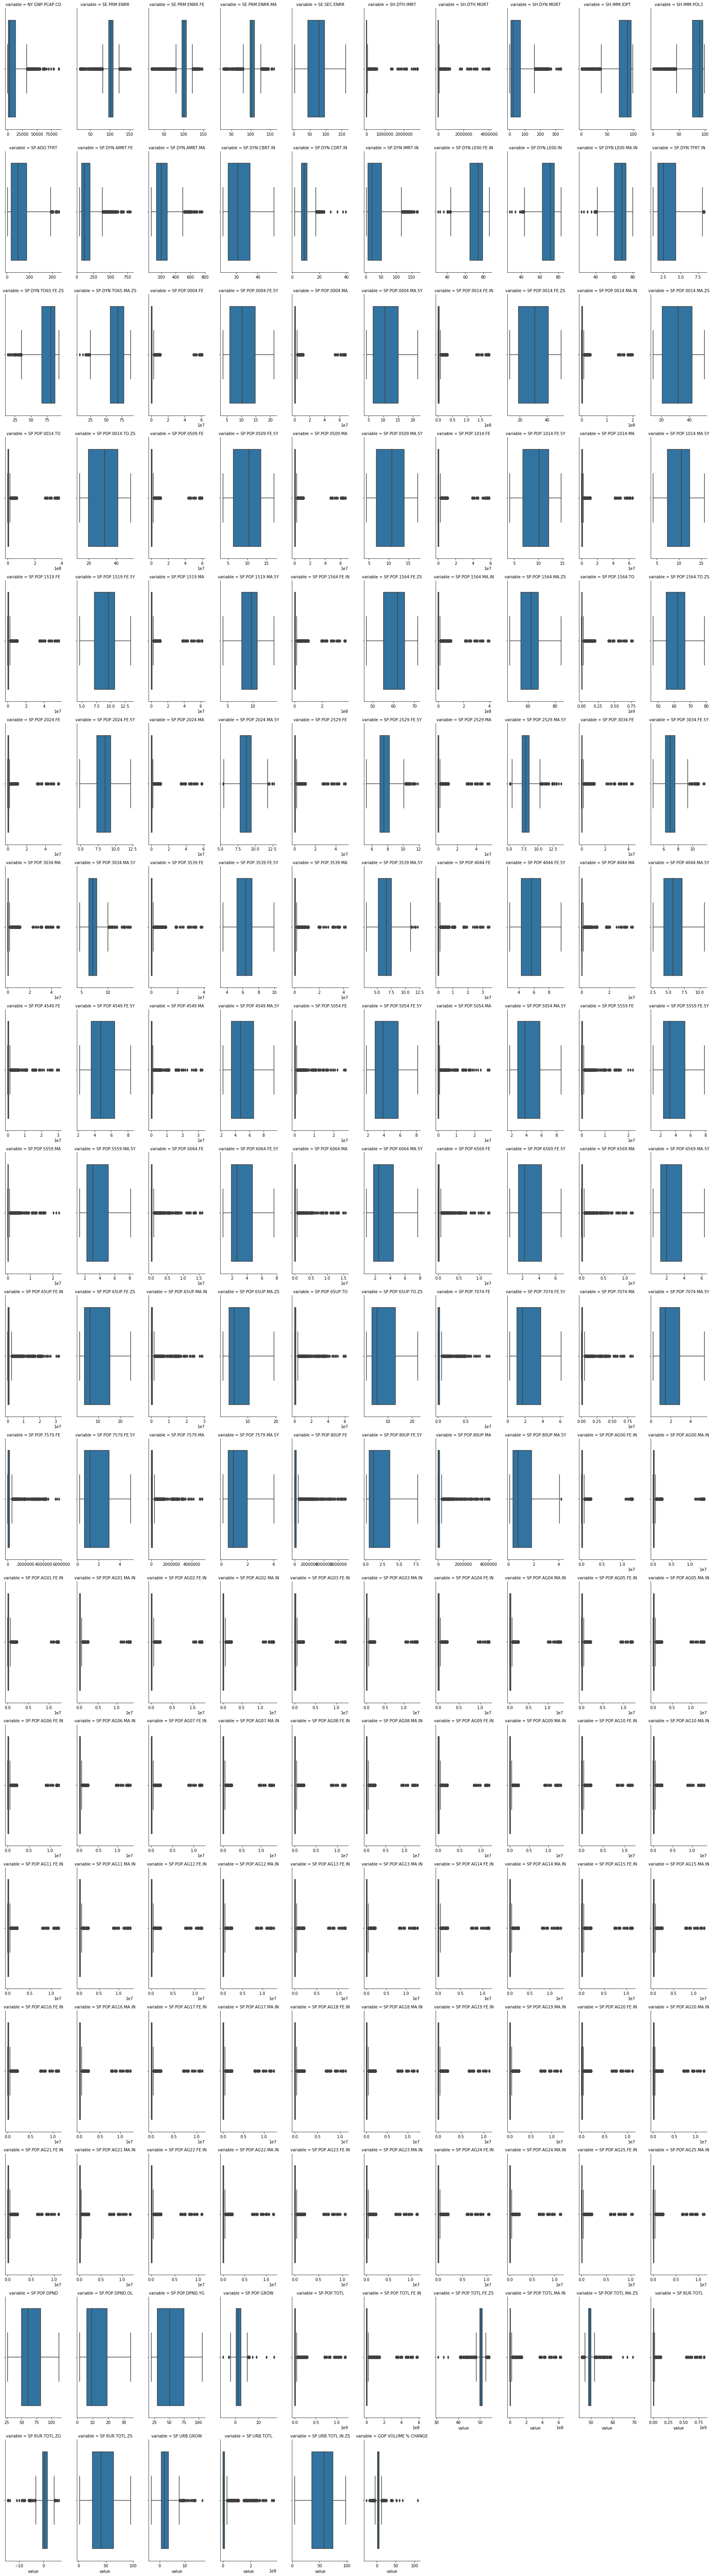

In [7]:
# Remove the one outlier from GDP Volume % Change
sdf2=sdf1[sdf1['GDP VOLUME % CHANGE']<150]
skinnydf1=pd.melt(sdf2, id_vars=['Country Name', 'Year'])
g = sns.FacetGrid(skinnydf1, col="variable", sharey=False,sharex=False, col_wrap=10, size=5, aspect=.5)
g = g.map(sns.boxplot, "value")
plt.show()

# Feature correlation 

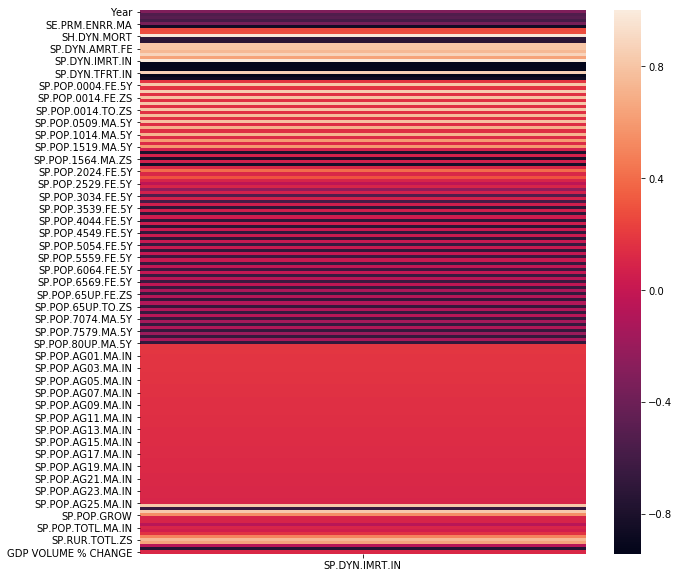

In [8]:
# Correlation matrix of features
# See which features correlate best with Infant mortality variables
CorrMa = sdf2.corr(method='pearson')
#.sort_values(by=['loan_status']))

plt.figure(figsize=(10,10))
sns.heatmap(CorrMa[['SP.DYN.IMRT.IN']])

# plotting the correlation between the variables and the generated feature
# increase plot and not decrease font size font_scale=1.5
plt.show()

In [9]:
# Most correlated with infant mortality are:
CorrMa['SP.DYN.IMRT.IN_abs']=abs(CorrMa['SP.DYN.IMRT.IN'])
CorrMaSorted=CorrMa.sort_values(by=['SP.DYN.IMRT.IN_abs'], ascending=False)
print (CorrMaSorted['SP.DYN.IMRT.IN_abs'].head(20))

SP.DYN.IMRT.IN       1.000000
SH.DYN.MORT          0.979867
SP.DYN.LE00.FE.IN    0.942577
SP.DYN.LE00.IN       0.937057
SP.DYN.LE00.MA.IN    0.921700
SP.DYN.TO65.FE.ZS    0.912274
SP.DYN.CBRT.IN       0.880861
SP.DYN.TFRT.IN       0.865932
SE.SEC.ENRR          0.855940
SP.DYN.TO65.MA.ZS    0.854328
SP.POP.0004.MA.5Y    0.845360
SP.POP.DPND.YG       0.827794
SP.POP.DPND          0.823465
SP.POP.0004.FE.5Y    0.821482
SP.POP.1564.MA.ZS    0.817435
SP.POP.1564.TO.ZS    0.814399
SP.ADO.TFRT          0.814148
SP.POP.0014.MA.ZS    0.813001
SP.DYN.AMRT.FE       0.806154
SP.POP.0014.TO.ZS    0.803644
Name: SP.DYN.IMRT.IN_abs, dtype: float64


# Decision Tree

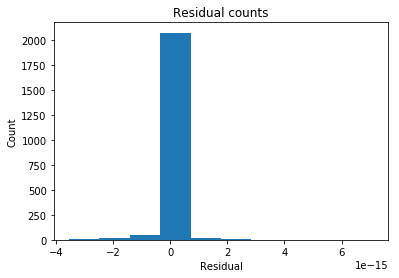

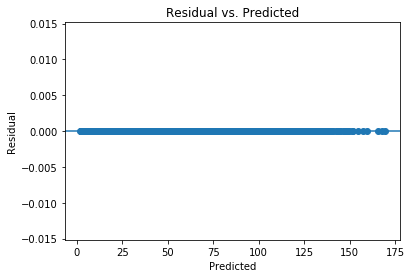

In [10]:
# This is the model we'll be using.
from sklearn import tree
# Packages for rendering our tree.
import pydotplus
import graphviz

data=sdf2.drop(['SP.DYN.IMRT.IN', 'Country Name'], axis=1)
target=sdf2['SP.DYN.IMRT.IN']

# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor(
    criterion='mse', # mean sqaure error
    #max_features=4, if None max_features= n features
    #max_depth=100 # cotinue tree until all leaves contain less than min_samples_split samples
)
decision_tree.fit(data, target)


predicted = decision_tree.predict(data)
actual=target
residuals=actual-predicted

# Error histogram
plt.hist(residuals)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Error scatter plot
plt.scatter(predicted, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# tenfold crossvalidation
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

dt_scores=cross_val_score(decision_tree, data, target, cv=10)

# RF

In [11]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor() # default 10 trees in the forest 
#The maximum depth of the tree. If None, then nodes are expanded until all 
#leaves are pure or until all leaves contain less than min_samples_split samples.

rfr_scores=cross_val_score(rfr, data, target, cv=10)

# Runtime comparison

In [ ]:
import timeit
from timeit import Timer
tdt = Timer(lambda: cross_val_score(decision_tree, data, target, cv=100))
rfrt = Timer(lambda: cross_val_score(rfr, data, target, cv=10))

tdt_time=[]
for i in range(10):
    tdt_time.append(tdt.timeit(number=1))

rfrt_time=[]
for i in range(10):
    rfrt_time.append(rfrt.timeit(number=1))


# Result


Text(0.5,0,'Models tried')

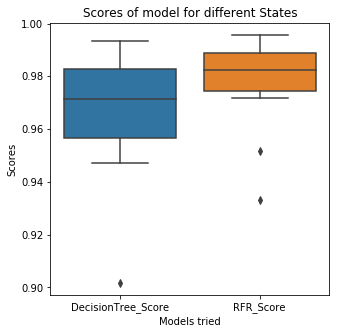

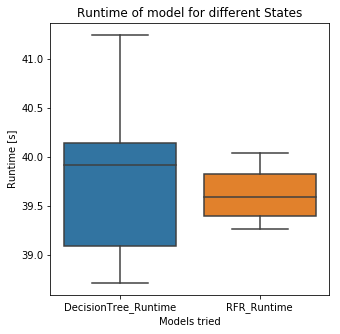

In [13]:
Scores = {'DecisionTree_Score': dt_scores, 'RFR_Score': rfr_scores, 'DecisionTree_Runtime': tdt_time,'RFR_Runtime': rfrt_time}
results = pd.DataFrame(data=Scores)


data=sdf2.drop(['SP.DYN.IMRT.IN', 'Country Name'], axis=1)
target=sdf2['SP.DYN.IMRT.IN']


# Make a boxplot for comparison
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
im = sns.boxplot(data=results[['DecisionTree_Score','RFR_Score']], ax=ax)
im.set_title('Scores of model for different States')
im.set_ylabel('Scores')
im.set_xlabel('Models tried')
# Make a boxplot for comparison
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
im = sns.boxplot(data=results[['DecisionTree_Runtime','RFR_Runtime']], ax=ax)
im.set_title('Runtime of model for different States')
im.set_ylabel('Runtime [s]')
im.set_xlabel('Models tried')

In my experiment I used the default mode for both models. But in order to correct for the number of trees, which by default is set to 10 in the random forest regressor per run, I also genereated 100 decision trees to make the run time comparable.

When both models run in default mode, the decision tree is on average slower and less precise. 